In [1]:
import tensorflow as tf
print(tf.__version__)


2.19.0


C:\Users\vatch\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


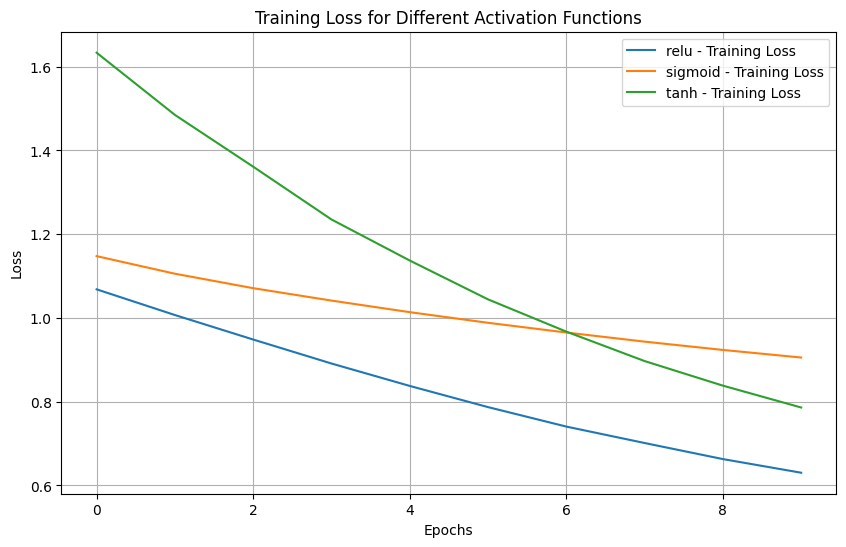

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Step 1: Load the Iris dataset (directly available from scikit-learn)
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Preprocess the data
# Standardize the features (mean = 0, variance = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode the target labels (since it's a classification task)
y_encoded = to_categorical(y, num_classes=3)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Step 3: Build a function to create the neural network model with different activation functions
def create_model(activation_func):
    model = Sequential([
        Dense(10, input_dim=X_train.shape[1], activation=activation_func),  # Hidden layer
        Dense(3, activation='softmax')  # Output layer with softmax for classification
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train the models with different activation functions (ReLU, Sigmoid, Tanh)
activations = ['relu', 'sigmoid', 'tanh']
histories = {}

for activation in activations:
    model = create_model(activation)
    history = model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_test, y_test), verbose=0)
    histories[activation] = history

# Step 5: Record training loss history and plot loss curves
plt.figure(figsize=(10, 6))

for activation, history in histories.items():
    plt.plot(history.history['loss'], label=f'{activation} - Training Loss')

plt.title('Training Loss for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Brief analysis of the results
# Here, we would discuss the results based on the plotted loss curves.
